# AI-PP8 reverse image search

[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PauliusU/AI-PP8-reverse-image-search/blob/master/AI-PP8-reverse-image-search.ipynb)

## Project description and key takeaways

Assignment required to take all the code available for Part 8 in the notebooks and create a single notebook. Copying cells manually posed a challenge. After failed initial tries it was evident that automatized approach should be prioritized.

Initial research suggested that `nbmerge` package could be used to solve automation problem.

First of all, this required to install the package:
```bash
pip install --upgrade --user nbmerge
```

After downloading all the notebooks for Part 8, the following command was used to merge then into a single one:
```bash
nbmerge P08_L01_Intro_to_Reverse_Image_Search_and_Feature_Extraction.ipynb P08_L02_Similarity_Search.ipynb P08_L03_Creating_a_Webapp.ipynb > AI-PP8-reverse-image-search.ipynb
```

However, first run showed that current environment contained some errors (missing dependencies when running locally, certain error in the code itself).
After some trial and errors, I was able to make merged notebook run without any issues.

> **❗WARNING❗**: Running notebook takes at least couple of hours to fully complete in the Google Colab.

Final conclusions: while implementing the solution I have once again faced the issue of package management in Python. Other languages like JavaScript/TypeScript, Rust, Go have one obvious and reliable(!) solution for package management.

However, package management in Python seems to be a total mess. pip, virtualenv, venv, pipenv, conda just to name a few alternatives.

According to The Zen of Python:
> In the face of ambiguity, refuse the temptation to guess.
> There should be one-- and preferably only one --obvious way to do it.

Python seems not to have one obvious solution for managing packages in a virtual environment. In this regard, Python does not seem to practice what it preaches. Google Colab is yet another environment with its own challenges. Implementing practical assignment help me to better understand Google Colab environment. Especially working with Files menu and controlling Google Colab sessions through "Runtime => Manage sessions" menu.







# Intro to RIS and Feature Extraction

# Image Similarity Problem

## Implementing Non ML approaches

### Loading images

Import an image and modify it a bit.

In [ ]:
!wget -qO redcarpet.jpeg https://www.decor-essentials.com/wp-content/uploads/2019/05/1fb481_ed9a03c8dc014f60ba65672c9274359e_mv2.jpg
!wget -qO cat_on_redcarpet.jpeg https://s3.us-east-2.amazonaws.com/jms-s3-mkt-pet-p-pmc6/tmp/image-thumbnails/meow-mix/remix/image-thumb__8720__auto_4fcd6c0ee5603d742cfa149c095d2f14/MeowMix_RemixLP_CelebrityCatsightingArticlePage_Desktop_RedCarpetMusicAwards.jpg

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# This is a BGR 
img1 = cv2.imread('redcarpet.jpeg')
img1.shape
plt.imshow(img1)

In [ ]:
# BGR to RGB :: [:,:,::-1]
img1 = cv2.imread('redcarpet.jpeg')[:,:,::-1]
img2 = cv2.imread('redcarpet.jpeg')[:,:,::-1]
img3 = cv2.imread('redcarpet.jpeg')[:,:,::-1]
img3 = cv2.resize(img3, (img2.shape[1], img2.shape[0])) # resize img3
img4 = cv2.imread('cat_on_redcarpet.jpeg')[:,:,::-1]
img4 = cv2.resize(img4, (img2.shape[1], img2.shape[0])) # resize img4
plt.imshow(img1)

In [ ]:
plt.imshow(img3)

In [ ]:
plt.imshow(img4)

### Subtraction comparison

In [ ]:
diff12 = cv2.subtract(img1, img2)
print(img1.shape)
print(diff12.shape) # returns pixel differences
print(np.sum(diff12))

... are images 3 and 1 indeed almost the same (appart from the figure added to image3)?

In [ ]:
img1[501]

In [ ]:
img2[501]

In [ ]:
img3[501]

In [ ]:
img4[501]

In [ ]:
diff13 = cv2.subtract(img1, img3)
print(np.sum(diff13)) # image compared to the same image with a triangle on it

In [ ]:
diff14 = cv2.subtract(img1, img4)
print(np.sum(diff14)) # different image

... the biggest possible image difference: *718 * 1230 * 3 * 256 = 678251520* 

In [ ]:
# percentage of "sameness"
print(img1.shape)
total_pixel_values = img1.shape[0] * img1.shape[1] * img1.shape[2] * 256
print(total_pixel_values, end="\n\n")

print((total_pixel_values - np.sum(diff12)) / total_pixel_values * 100)
print((total_pixel_values - np.sum(diff13)) / total_pixel_values * 100)
print((total_pixel_values - np.sum(diff14)) / total_pixel_values * 100)

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(diff13) # note: img1-img3 != img3-img1. If you subtract and image location that is black (value 0) it will result in 0 diff.

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(diff14)

In [ ]:
diff41 = cv2.subtract(img4, img1)
plt.figure(figsize=(15, 7))
plt.imshow(diff41)

### Histogram comparison

To remind you: a histogram is a representation of a distribution of numerical data (student grades) using bars of different heights that represent the frequncy of each number. Since images are just numbers they too can have a distribution (0-black, 255-white for grayscale, same scale applies for RGB). There are image processing techniques that use the histogram for some transformations (like contrast adjustment w/ histogram equalization). 

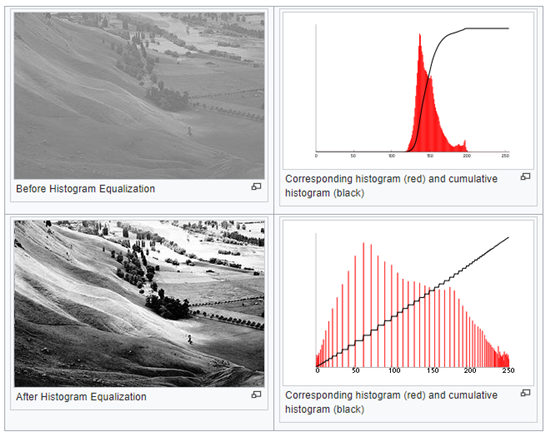

A histogram represents how many pixels of a particular value there are, not where they are. That is the essence. And that means that we can compare histograms. This is called: histogram comparison. Let's see the histograms of previous images and compare them.

In [ ]:
plt.imshow(img1)

In [ ]:
img1_hist_1 = cv2.calcHist([img1],[0],None,[256],[0,256])
img1_hist_2 = cv2.calcHist([img1],[1],None,[256],[0,256])
img1_hist_3 = cv2.calcHist([img1],[2],None,[256],[0,256])

fig, xs = plt.subplots(1,3) # rows and columns
fig.set_size_inches((15, 5))

xs[0].plot(img1_hist_1)
xs[1].plot(img1_hist_2)
xs[2].plot(img1_hist_3)

fig.subplots_adjust(wspace=0.8)
fig.tight_layout()
fig.show()

In [ ]:
color = ('b','g','r')
plt.figure(figsize=(20,8))
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Do you see anything weird? We have an image that has a lot of RED color, but the historgram does not reflect that. It shows that we have a lot of low intensity RED, GREEN and BLUE and a comparativelly more BLUE hight intensity pixels. But we know that this is not true from the image. What could be wrong?

In [ ]:
color = ('b','g','r')
plt.figure(figsize=(20,8))
for i,col in enumerate(color):
    histr = cv2.calcHist([cv2.imread('redcarpet.jpeg')],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

The answer is - we changed the color representation to RGB so that matplotlib would display it properly. A good lesson to remember when working with images - be aware of RGB to BGR transformations!

In [ ]:
color_channel = 1

img1_hist = cv2.calcHist([img1],[color_channel],None,[256],[0,256])
img2_hist = cv2.calcHist([img2],[color_channel],None,[256],[0,256])
img3_hist = cv2.calcHist([img3],[color_channel],None,[256],[0,256])
img4_hist = cv2.calcHist([img4],[color_channel],None,[256],[0,256])

plt.plot(img1_hist)
plt.plot(img3_hist)

Finally, let's compare the histograms. With a shitogram approach very similar images are closer together and not so similar images are further apart than when using subtraction comparison.

In [ ]:
print(cv2.compareHist(img1_hist, img1_hist, 0))
print(cv2.compareHist(img1_hist, img2_hist, 0))
print(cv2.compareHist(img1_hist, img3_hist, 0))
print(cv2.compareHist(img1_hist, img4_hist, 0))

### MSE

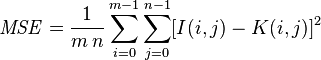

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
print(mse(img1, img2))
print(mse(img1, img3))
print(mse(img1, img4))

# max mse is the difference between the completelly white and completelly black image for a particular size (245 * 245 * 3)
# max mse for a particular image would be more difficult to calculate we would need something like an inverse image to get the max error
print(img1.shape)

print(np.zeros((718, 1230, 3)).shape)
print(mse(img1, np.zeros((718, 1230, 3)))) # max mse

TODO :: covert the mse based similar score to percentages

### SSIM

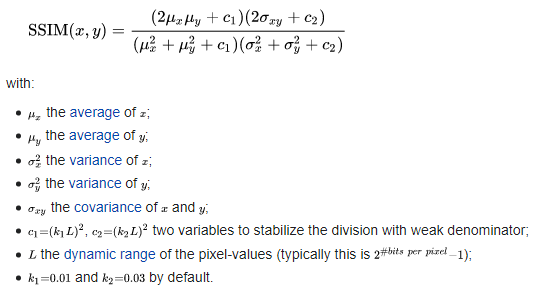

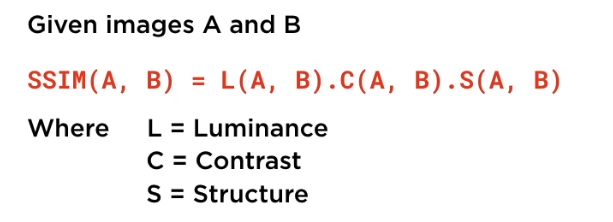

The SSIM varies between -1 and 1, where 1 means that the image is very similar to another image.

In [ ]:
from skimage.metrics import structural_similarity

print(structural_similarity(img1, img1, multichannel=True))
print(structural_similarity(img1, img2, multichannel=True))
print(structural_similarity(img1, img3, multichannel=True))
print(structural_similarity(img1, img4, multichannel=True))

SSIM is more precise than MSE. For example if you added some noise to an image vs. changing it's colors MSE would be similar in both cases, but SSIM would be different.

## Deep Learning approaches

## Cosine vs. Euclidian distance

# Feature Extraction

We will extract features from pretrained models like VGG-16, VGG-19, ResNet-50, InceptionV3 and MobileNet and benchmark them using the Caltech101 dataset.

## Dataset

Download the Caltech101 dataset (or try it on your dataset). Please note (as of 01 September 2020) the Caltech 101 dataset has moved locations and now has to be downloaded through Google Drive using `gdown`.

```
$ gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output caltech101.tar.gz
$ tar -xvzf caltech101.tar.gz
$ mv 101_ObjectCategories datasets/caltech101
```
Note that there is a 102nd category called ‘BACKGROUND_Google’ consisting of random images not contained in the first 101 categories, which needs to be deleted before we start experimenting. 

```
$ rm -rf datasets/caltech101/BACKGROUND_Google
```

In [ ]:
!rm -rf datasets

In [ ]:
# !pip install gdown # uncomment in case you are running on kaggle / aws or locally
!mkdir -p datasets
!pip install gdown # not necessary when running on google colla
!gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output datasets/caltech101.tar.gz
!tar -xvzf datasets/caltech101.tar.gz --directory datasets
!mv datasets/101_ObjectCategories datasets/caltech101
!rm -rf datasets/caltech101/BACKGROUND_Google

In [ ]:
!ls -laht ./datasets
!du -hcs ./datasets/caltech101

In [ ]:
# you can programatically check if you are inside a collab environment using an env variable
import os
print(os.environ)

# finally the check
if 'COLAB_GPU' in os.environ:
   print("I'm running on Colab")

# you can also convert a python object into a dict using vars functions.
# ... the benefit being that it will be displayed line by line
# vars(os.environ)['_data']

## Import libs

In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import random
import time
import math
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

## Helper functions

We will define a helper function that allows us to choose any pretrained model with all the necessary details for our experiments.

In [ ]:
# vgg16
# vgg19
# mobilenet
# inception
# resnet
# xception

def model_picker(name):
    if (name == 'vgg16'):
        model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'vgg19'):
        model = VGG19(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3),
                      pooling='max')
    elif (name == 'mobilenet'):
        model = MobileNet(weights='imagenet',
                          include_top=False,
                          input_shape=(224, 224, 3),
                          pooling='max',
                          depth_multiplier=1, # TODO :: explanation
                          alpha=1) # TODO :: explnation
    elif (name == 'inception'):
        model = InceptionV3(weights='imagenet',
                            include_top=False,
                            input_shape=(224, 224, 3),
                            pooling='max')
    elif (name == 'resnet'):
        model = ResNet50(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='max')
    elif (name == 'xception'):
        model = Xception(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3),
                         pooling='max')
    else:
        print("Specified model not available")
    return model

In [ ]:
model_architecture = 'resnet'
model = model_picker(model_architecture)

Let's define a function to extract image features given an image and a model.

In [ ]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    # TODO Restnet preprocessing is used but another model can be used for inference
    preprocessed_img = tensorflow.keras.applications.resnet50.preprocess_input(expanded_img_array)

    features = model.predict(preprocessed_img)              # pass the image through CNN (no head!)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features) # comes from numpy.linalg
    return normalized_features

The feature length the model generates.

In [ ]:
features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)
print(len(features))
print(features.shape) # flat

In [ ]:
model.summary()

## Embeddings

So we obtained the feature vector. ***We hope that it satisfies the property of embeddings***. What are embeddings? 

We talked about embeddings in the tabular data part of the course. To refresh your mind: these are vectors representing the underlying data (words, data points in a table, images) in a way that when the underlying data is "similar" the embedding vectors are close to each other in some vector space (Euclidian space). Embeddings are learned by the CNN, you can not just "know" an embedding. 

The **underlying assumption** of the reverse image search is that if an image classifier is effective for a particular image it will produce an effective feature map satisfying the embedding property. 

## Digression on linalg.norm

In [ ]:
arr = np.array([30,2,1])

print(arr)
print(norm(arr))
print(arr / norm(arr)) # Frobenius Norm / L2 norm - Linear Algebra. Between 0 and 1.

# Statistical normalization
print((arr - arr.mean()) / arr.std()) # centered around zero.

# you can also use sklearn for that
import numpy as np
from sklearn.preprocessing import normalize
norm1 = arr / np.linalg.norm(arr)
norm2 = normalize(arr[:,np.newaxis], axis=0).ravel()
print(np.all(norm1 == norm2))

## Benchmarking feature extraction

See how much time it takes to extract features of one image.

In [ ]:
# model = model_picker('vgg16')
# %timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

# model = model_picker('vgg19')
# %timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

# model = model_picker('mobilenet')
# %timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

# model = model_picker('inception')
# %timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

# model = model_picker('resnet')
# %timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

model = model_picker('xception')
%timeit -n 10 features = extract_features('datasets/caltech101/cougar_body/image_0025.jpg', model)

# 2020
# vgg16 - 10 loops, best of 3: 64.7 ms per loop
# vgg19 - 1 loop, best of 3: 73.2 ms per loop
# mobilenet - 10 loops, best of 3: 41 ms per loop
# inception - 10 loops, best of 3: 72.8 ms per loop
# resnet - 10 loops, best of 3: 60.5 ms per loop
# xception - 10 loops, best of 3: 59.3 ms per loop

# 2021
# mobilenet - 10 loops, best of 5: 62.5 ms per loop
# xception - 10 loops, best of 5: 72.8 ms per loop

# 2022
# mobilenet - 47.5 ms ± 12.3 ms per loop [Kaggle: 43.3 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)]
# xception - 65.3 ms ± 22.6 ms per loop [Kaggle: 49.7 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)]

The time taken to extract features is dependent on a few factors such as image size, computing power etc. A better benchmark would be running the network over an entire dataset. A simple change to the existing code will allow this.

Let's make a handy function to recursively get all the image files under a root directory.

In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']

def get_file_list(root_dir):
    file_list = []
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
    return file_list

Now, let's run the extraction over the entire dataset and time it.

In [ ]:
# a much better looking tqdm for notebook environments
from tqdm.notebook import tqdm as tqdm_nb

# path to the your datasets
root_dir = 'datasets/caltech101'
# filenames = sorted(get_file_list(root_dir)[:1000]) # final run on all images
filenames = sorted(get_file_list(root_dir))

In [ ]:
feature_list = []
model = model_picker('mobilenet')
for i in tqdm_nb(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

# 2020
# vgg16 - 1000/1000 [01:12<00:00, 13.75it/s]
# vgg19 - 1000/1000 [01:22<00:00, 12.08it/s]
# mobilenet - 1000/1000 [00:38<00:00, 25.88it/s] / 1000/1000 [00:50<00:00, 19.98it/s] # https://research.google.com/colaboratory/faq.html#usage-limits
# inception - 1000/1000 [01:22<00:00, 12.07it/s]
# resnet - 1000/1000 [00:50<00:00, 19.77it/s]
# xception - 1000/1000 [00:48<00:00, 20.73it/s]

# 2021
# mobilenet - 1000/1000 [01:15<00:00, 13.48it/s]

# 2022
# mobilenet - 1000/1000 [00:47<00:00, 21.47it/s]

Now let's try the same with the Keras Image Generator functions.

In [ ]:
batch_size = 64
datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

generator = datagen.flow_from_directory(root_dir,
                                        target_size=(224, 224),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

num_images = len(generator.filenames)
print(num_images)

num_epochs = int(math.ceil(num_images / batch_size))

model = model_picker('resnet')
start_time = time.time()
feature_list = []
feature_list = model.predict(generator, num_epochs) # workers=4, use_multiprocessing=True)
end_time = time.time()

In [ ]:
!ls -alht datasets/caltech101/Leopards | wc -l

In [ ]:
for i, features in enumerate(feature_list):
    feature_list[i] = features / norm(features)

feature_list = feature_list.reshape(num_images, -1)

print("Num images   = ", len(generator.classes))
print("Shape of feature_list = ", feature_list.shape)
print("Time taken in sec = ", end_time - start_time)

# 2020
# vgg16 - Time taken in sec =  70.36205959320068
# vgg19 - 
# mobilenet - Time taken in sec =  22.210083484649658
# inception - 
# resnet -
# xception - Time taken in sec =  89.15535926818848

# 2021
# mobilenet - Time taken in sec =  22.699695348739624

# 2022
# mobilenet - Time taken in sec =  20.713704347610474

## GPU Utilization

GPUs are optimized to parallelize the feature generation process and hence will give better results when multiple images are passed instead of just one image. The opportunity to improve can be seen based on GPU Utilization. Low GPU Utilization indicates an opportunity to further improve the througput.

GPU Utilization can be seen using the nvidia-smi command. To update it every half a second

In [ ]:
!nvidia-smi -h

In [ ]:
!nvidia-smi --query-gpu=utilization.gpu --format=csv,noheader,nounits

In [ ]:
# !watch -n .5 nvidia-smi # don't run this in collab

To pool the GPU utilization every second and dump into a file. We will use a background process for it, see: https://stackoverflow.com/a/32801606

In [ ]:
%%script bash --bg
nvidia-smi --query-gpu=utilization.gpu --format=csv,noheader,nounits -l 1 -f gpu_utilization.csv

In [ ]:
!nvidia-smi --query-gpu=utilization.gpu --format=csv,noheader,nounits -l 1 -f gpu_utilization.csv

In [ ]:
# !nvidia-smi --help
!cat gpu_utilization.csv

In [ ]:
%killbgscripts

In [ ]:
# !nvidia-smi --query-gpu=utilization.gpu --format=csv,noheader,nounits -f gpu_utilization.csv

[TBD] ... another tool

In [ ]:
!pip install kora

In [ ]:
from kora import console
console.start()

To calculate median GPU Utilization from the file generated

Model | Time second (sec) | batch_size | % GPU Utilization | Implementation
--- | --- | --- | --- | --- 
Resnet50 | 124 | 1 | 52 | extract_features 
Resnet50 | 98 | 1 | 72 |ImageDataGenerator 
Resnet50 | 57 | 2 | 81 | ImageDataGenerator 
Resnet50 | 40 | 4 | 88 | ImageDataGenerator
Resnet50 | 34 | 8 | 94 | ImageDataGenerator
Resnet50 | 29 | 16 | 97 | ImageDataGenerator
Resnet50 | 28 | 32 | 97 | ImageDataGenerator
Resnet50 | 28 | 64 | 98 | ImageDataGenerator |

In [ ]:
!apt-get install datamash

In [ ]:
!sort -n gpu_utilization.csv

In [ ]:
!sort -n gpu_utilization.csv | datamash mean 1

In [ ]:
!sort -n gpu_utilization.csv | datamash -H mean 1 q1 1 median 1 q3 1 iqr 1 sstdev 1 jarque 1 

In [ ]:
!cat gpu_utilization.csv

... another

In [ ]:
# !pip install wandb
# import wandb
# wandb.init()

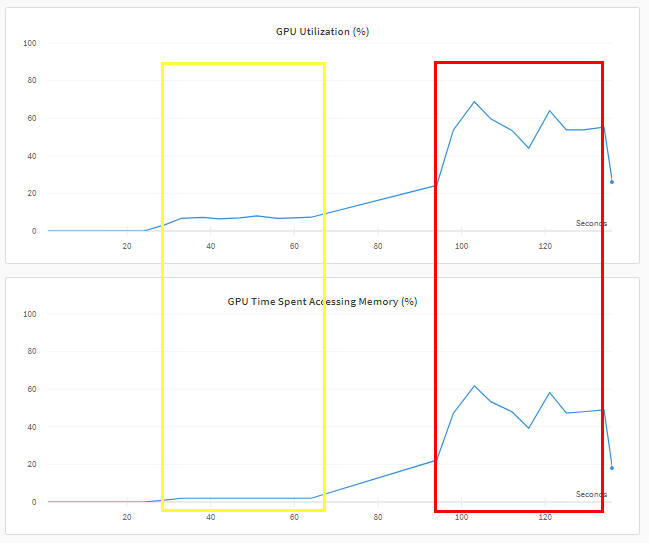

## Why no benching when learning?

The GPU utilization is not as important when doing learning. Why? Because batch size is a hyperparameter that affects learning. We prioritize precision over performance when we are trying to learn. When we are doing feature extraction we don't learn anything, there is no weight update stage (only predict()). So we just need the output of a trained CNN.

## Model architecture relative speeds

Keeping batch size of 64, benchmarking the different models

Model | items/second 
--- | ---
VGG19 | 31.06 | 
VGG16 | 28.16 | 
Resnet50 | 28.48 
Inception | 20.07 
Mobilenet | 13.45

Let's save the features as intermediate files to use later.

In [ ]:
filenames = [root_dir + '/' + s for s in generator.filenames]

In [ ]:
print(len(list(generator.classes)))
print(len(filenames))

In [ ]:
!mkdir data

pickle.dump(generator.classes, open('./data/class_ids-caltech101.pickle', 'wb'))
pickle.dump(filenames, open('./data/filenames-caltech101.pickle', 'wb'))
pickle.dump(feature_list, open('./data/features-caltech101-' + model_architecture + '.pickle', 'wb'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.save('./model-finetuned.h5')
model.summary()

## Custom trained TF model

In [ ]:
# from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
TRAIN_SAMPLES = 8677
NUM_CLASSES = 101
IMG_WIDTH, IMG_HEIGHT = 224, 224
batch_size = 64

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(root_dir,
                                                    target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=12345,
                                                    class_mode='categorical')

In [ ]:
def model_maker():
    base_model = ResNet50(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    # base_model = MobileNet(weights='imagenet',
    #                       include_top=False,
    #                       input_shape=(224, 224, 3),
    #                       pooling='max',
    #                       depth_multiplier=1,
    #                       alpha=1)
    for layer in base_model.layers[:]:
        # layer.trainable = False
        layer.trainable = True
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model) # Resnet gives (1, 2048) if poolling applied and 7x7x2048 if not
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    return Model(inputs=input, outputs=predictions)

In [ ]:
model_finetuned = model_maker()
model_finetuned.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(0.002), metrics=['acc'])
model_finetuned.fit(train_generator, steps_per_epoch=math.ceil(float(TRAIN_SAMPLES) / batch_size), epochs=8)

In [ ]:
model_finetuned.save('./model-finetuned.h5')

In [ ]:
from keras.models import load_model
model_finetuned = load_model('./model-finetuned.h5')

This is how much GPU is loaded on kaggle 

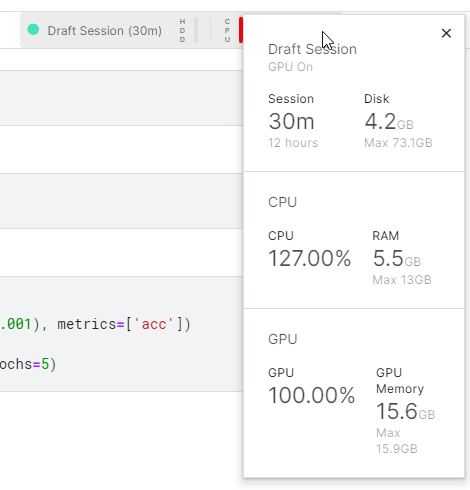

## Feature extraction with the trained model

In [ ]:
model_finetuned.summary()

In [ ]:
# Model: "model"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
# _________________________________________________________________
# mobilenet_1.00_224 (Function (None, 1024)              3228864   
# _________________________________________________________________
# dense (Dense)                (None, 64)                65600     
# _________________________________________________________________
# dropout (Dropout)            (None, 64)                0         
# _________________________________________________________________
# dense_1 (Dense)              (None, 101)               6565      
# =================================================================
# Total params: 3,301,029
# Trainable params: 3,279,141
# Non-trainable params: 21,888
# _________________________________________________________________

In [ ]:
# model_finetuned.layers[1].layers # model layers, but without names
model_finetuned.layers[1].summary()

In [ ]:
from keras import Sequential

finetunned_cnn = Sequential()
# finetunned_cnn.add(model_finetuned.get_layer('mobilenet_1.00_224')) # resnet50 or mobilenet_1.00_224 
finetunned_cnn.add(model_finetuned.get_layer('resnet50'))
finetunned_cnn.add(GlobalAveragePooling2D()) # TODO :: Why additinal pooling?

start_time = time.time()
feature_list_finetuned = []
feature_list_finetuned = finetunned_cnn.predict(generator, num_epochs)
end_time = time.time()

for i, features_finetuned in enumerate(feature_list_finetuned):
    feature_list_finetuned[i] = features_finetuned / norm(features_finetuned)
feature_list = feature_list_finetuned.reshape(num_images, -1)

print("Num images = ", len(generator.classes))
print("Shape of feature_list = ", feature_list.shape)
print("Time taken in sec = ", end_time - start_time)
print("Items per second = ", len(generator.classes) / (end_time - start_time))

In [ ]:
# pickle.dump(feature_list, open('./features-caltech101-mobilenet-finetuned-2022-09-20-no-last-polling.pickle', 'wb'))
# pickle.dump(feature_list, open('./features-caltech101-mobilenet-finetuned-2022-09-20.pickle', 'wb'))
pickle.dump(feature_list, open('./features-caltech101-resnet-finetuned.pickle', 'wb'))

# TODO

- CI1P
- **[DONE]** Verify that the number of output dimensions is different for different TF models (2048 vs 1024 dimensions).
- **[DONE]** Implement the model benchmarks and run them.
- **[DONE]** Explain each similarity measurement w/ Cosine and Euclidian distances
- **[DONE]** Fix the tables
- **[DONE]** Implement subraction, histogram, MSE and SSIM similarity measure examples
- Implement GPU dashboards: https://medium.com/rapids-ai/gpu-dashboards-in-jupyter-lab-757b17aae1d5
- **[DONE]** Add wandb implementation

# Similarity Search

Part 1 - indexer to index features and search for most similar features using various nearest neighbor algorithms, explore various methods of visualizing plots.

Part 2 - benchmark the algorithms based on the time it takes to index images and locate the most similar image based on its features using the Caltech-101 dataset. Experiment with t-SNE and PCA.

Part 3 - calculate the accuracies of the features obtained from the pretrained and finetuned models.

## Part 1 - Visualization

### KNN

Here we visualize some query images represented by their standard features with their nearest neighbors

In [ ]:
import numpy as np
import pickle
from tqdm import tqdm, tqdm_notebook
import random
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors

import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
!mkdir -p datasets
!gdown https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp --output datasets/caltech101.tar.gz
!tar -xvzf datasets/caltech101.tar.gz --directory datasets
!mv datasets/101_ObjectCategories datasets/caltech101
!rm -rf datasets/caltech101/BACKGROUND_Google

Loading the files we wrote to disk in our previous notebook.

In [ ]:
filenames = pickle.load(open('./data/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('./data/features-caltech101-resnet.pickle', 'rb'))
class_ids = pickle.load(open('./data/class_ids-caltech101.pickle', 'rb'))

In [ ]:
num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

In [ ]:
# define the indexer - the object that calculates the NNs
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean').fit(feature_list)

In [ ]:
random_index = 987 # 987 Has a horizontally flipped image - very usefull for testing, as CNNs are good at identifying horizontally flipped images as similar
distances, indices = neighbors.kneighbors([feature_list[random_index]])
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

In [ ]:
print(indices)
print(distances)

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]), interpolation='lanczos')

Isn’t that a duplicate? Actually, the nearest index will be the image itself because that is what is being queried.

Let’s plot the real first nearest neighbor.

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

Caltech-101 is a good dataset for RIS as it contains flipped images. We can note that when **testing RIS apps flipped images are a good way to see if the RIS is working correctly**. NOTE: it is rare that a CNN would be efficient in understanding a vertically flipped images, because it is rare to have a need to train a CNN with images that contain upsidown tractors/cats and so on (unless you work on a certain domain - cell images for example, where the problem might be flip-invariant).

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][2]]), interpolation='lanczos')
# plt.imshow(mpimg.imread(filenames[indices[0][3]]), interpolation='lanczos')

In [ ]:
for i in range(5):
    print(distances[0][i])

Note the distance of the query image to the first closest image is zero, again showing that the closest image to the query image is the same image.

### Reminder about KNN

Remember **how KNN algorithm works** - we boil it down to a set of step one would take when implementing KNN:
1. Take a set of data points that interest you - you have employee data.
1. Define a set of features that you think are helpful or take all the features - years of experience, avg. working hours, avg. vacation time / year, years in the academy, salary. This will be our feature space - a euclidian space that we can image our datapoints can be added to. 
1. Take a new data point and calculate the closest neighbors using some distance measure. You can choose how many neightbors should be taken into acount and the distance metric.
1. Based on K nierest neighbors you can clasify the new datapoint.

KNN **basic idea**: take a bunch of data in a feature space and for new data (that you donw't know how to classify, for example) calculate the nearest neighbors. It's a supervised learning technique, although K Means Clustering is a very similar algorithm used for clustering (which is unsupervised). Important to remember: this algorihtm can be used for classification and regression.

**Tie breaking**: if k is odd - no tie. If k is even you have options (random choise, return tied categories, return a message to increase k by 1). 

**Explanation**: https://www.youtube.com/watch?v=HVXime0nQeI

**Implementation in scikit**: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html . Tie breaking algorithm: https://stats.stackexchange.com/a/144734

**Metrics**: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric When is manhattan distance (L1): https://datascience.stackexchange.com/questions/20075/when-would-one-use-manhattan-distance-as-opposed-to-euclidean-distance 

| identifier | class name | args | distance function | explanation |
| ---------- | ---------- | ---- | ----------------- | ----------- |
| euclidean | EuclideanDistance | | sqrt(sum((x - y)^2)) | most intuitive, pythagorean| 
| manhattan | ManhattanDistance | | sum(\|x - y\|) | seems to be more usefull in high dimensional problems, see: [SO](https://datascience.stackexchange.com/questions/20075/when-would-one-use-manhattan-distance-as-opposed-to-euclidean-distance) |

### Experiments

In [ ]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]

# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]

# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances, cols=4, figsize=(20, 10)):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / cols + 1, cols, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) + "\nDistance: " + str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)

        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        # plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)

In [ ]:
for i in range(4):
    random_image_index = random.randint(0, num_images)
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])

If your model was not trained sufficiently for image classification, then it will not produce the most accurate results. Sometimes it is intereting to try and guess WHY certain results were produced. In this case we are doing this intuitivelly, however a more rigorous approach would be to take a look at how the CNN classifies those images and improve the network untill the classification is correct. We could also investigate image heatmaps / cnn activation maps (CAMs) to see which parts of image were significant: https://glassboxmedicine.com/2019/06/11/cnn-heat-maps-class-activation-mapping-cam/

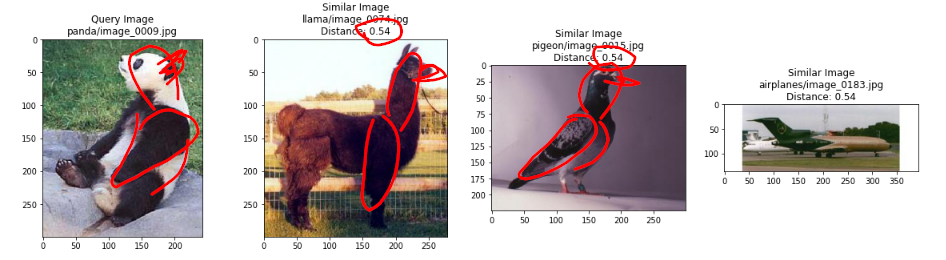

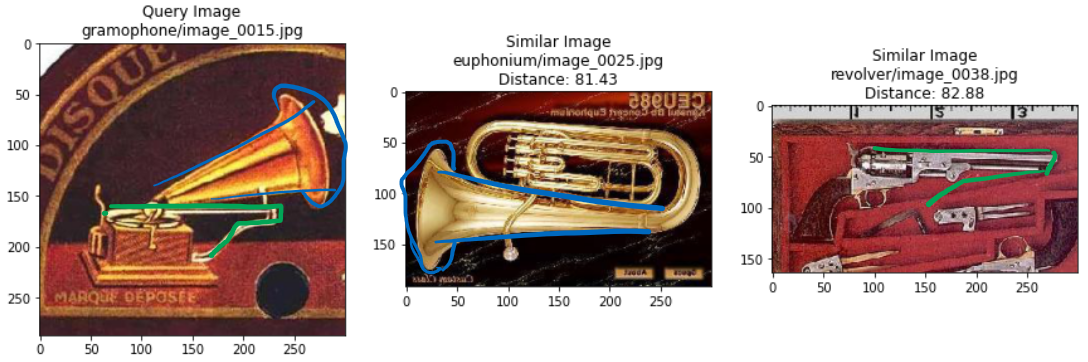

Let us get a sense of the similarity values by looking at distance stats over the dataset.

In [ ]:
neighbors = NearestNeighbors(n_neighbors=len(feature_list), algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors(feature_list)

# Calculating some stats
print("Median distance between all photos: ", np.median(distances))
print("Max distance between all photos: ", np.max(distances))
print("Median distance among most similar photos: ", np.median(distances[:, 2]))

This can serve in understanding if the model is performing better than before or worse.

Select the amount of data you want to run the experiments on. Leave the square brackets like this: `[:]` to run all.

In [ ]:
selected_features = feature_list[:1000]
selected_class_ids = class_ids[:1000]
selected_filenames = filenames[:1000]

Alternatively, for ease of illustration and speed we can simply pick a thousand image samples to plot the t-SNE results.

In [ ]:
selected_features = feature_list[7000:8000]
selected_class_ids = class_ids[7000:8000]
selected_filenames = filenames[7000:8000]

Note: It is important to run the entire dataset, if you wish to benchmark the entire dataset.

### t-SNE

The t-SNE algorithm is useful for visualizing high dimensional data.

In [ ]:
from sklearn.manifold import TSNE

# You can play with these values and see how the results change
n_components = 2
verbose = 1
perplexity = 30
n_iter = 1000
metric = 'euclidean'

time_start = time.time()
tsne_results = TSNE(n_components=n_components,
                    verbose=verbose,
                    perplexity=perplexity,
                    n_iter=n_iter,
                    metric=metric).fit_transform(selected_features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

In [ ]:
color_map = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:, 0],
                           tsne_results[:, 1],
                           c=selected_class_ids,
                           cmap=color_map)
plt.colorbar(scatter_plot)
plt.show()
# To save the plot in a high definition format i.e. PDF, uncomment the following line:
#plt.savefig('results/' + str(ADD_NAME_HERE)+'.pdf', format='pdf', dpi=1000)

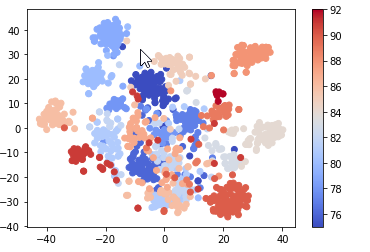

Is t-SNE deterministic / consistent between runs?

In [ ]:
n_components = 2
verbose = 1
perplexity = 30
n_iter = 1000
metric = 'euclidean'

tsne_results = TSNE(n_components=n_components,
                    verbose=verbose,
                    perplexity=perplexity,
                    n_iter=n_iter,
                    metric=metric).fit_transform(selected_features)

color_map = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:, 0],
                           tsne_results[:, 1],
                           c=selected_class_ids,
                           cmap=color_map)
plt.colorbar(scatter_plot)
plt.show()

... no, it is not the same between runs. So we will treat it as only a smoke-test / quick-check technique

#### t-sne visualization

Now we write a helper function to plot images in 2D for t-SNE.

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    if axis is None:
        axis = plt.gca()
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        image.thumbnail((100, 100), Image.ANTIALIAS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        axis.add_artist(anno_box)
    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()

The following is a helper function to render a t-SNE plot.

In [ ]:
def show_tsne(x, y, selected_filenames, zoom=0.3, size=(22, 22)):
    fig, axis = plt.subplots()
    fig.set_size_inches(size[0], size[1], forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=zoom, axis=axis)
    plt.show()

 Visualize the patterns in the images using t-SNE

In [ ]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], selected_filenames, zoom=0.3, size=(30, 30))

The show_tsne function piles images one on top of each other, making it harder to discern the patterns as the density of images is high. To help visualize the patterns better, we write another helper function tsne_to_grid_plotter_manual that spaces the images evenly.

In [ ]:
def tsne_to_grid_plot(x, y, selected_filenames):
    S = 2000
    s = 100
    x = (x - min(x)) / (max(x) - min(x))
    y = (y - min(y)) / (max(y) - min(y))
    x_values = []
    y_values = []
    filename_plot = []
    x_y_dict = {}
    for i, image_path in enumerate(selected_filenames):
        a = np.ceil(x[i] * (S - s))
        b = np.ceil(y[i] * (S - s))
        a = int(a - np.mod(a, s))
        b = int(b - np.mod(b, s))
        if str(a) + "|" + str(b) in x_y_dict:
            continue
        x_y_dict[str(a) + "|" + str(b)] = 1
        x_values.append(a)
        y_values.append(b)
        filename_plot.append(image_path)
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x_values, y_values, filename_plot, zoom=.58, axis=axis)
    plt.show()

In [ ]:
tsne_to_grid_plot(tsne_results[:, 0], tsne_results[:, 1], selected_filenames)

## Part 2 - building and returning

Benchmark the algorithms based on the time it takes to index images and locate the most similar image based on its features using the Caltech-101 dataset. We also experiment with PCA. We choose a random image to make the experiments with:

In [ ]:
random_image_index = random.randint(0, num_images)
random_image_index

### Standard features + Brute Force Algorithm on one image

We will be timing the indexing for various Nearest Neighbors algorithms, so let's start with timing the indexing for the Brute force algorithm. While running terminal commands in iPython like the timeit command, the variables are not stored in memory, so we need to rerun the same command to compute and store the results in the variable.

In [ ]:
%timeit -n 10 NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
# neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)

Now, let's look at the time it takes to search for the nearest neighbors for the selected random image using the trained model with the Brute force algorithm.

In [ ]:
%timeit -n 10 neighbors.kneighbors([feature_list[random_image_index]])

### Standard features + k-d Tree Algorithm on one image

In [ ]:
%timeit -n 5 NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(feature_list)
neighbors = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(feature_list)

In [ ]:
%timeit -n 10 neighbors.kneighbors([feature_list[random_image_index]])
# faster than bruteforce search at the expense of prebiulding the kdtree

### Standard features + Ball Tree Algorithm on one image

In [ ]:
%timeit -n 5 NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(feature_list)
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(feature_list)

In [ ]:
%timeit -n 10 neighbors.kneighbors([feature_list[random_image_index]])

We will increase the number of our test images so that we can experiment with how the scalability of different nearest neighbors algorithms change. Let's choose a random set of 100 or 1000 images to experiment.

Note: the results may change if any of the images are changed

Generate a list of images to do the next set of experiments on.

In [ ]:
print("Number of images = ", num_images)
random_image_indices = random.sample(range(0, num_images), 1000)
random_feature_list = [ feature_list[each_index] for each_index in random_image_indices ]

### Standard features + Brute Force Algorithm on a set of images

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
%timeit -n 5 neighbors.kneighbors(random_feature_list) 

### Standard features + k-d Tree Algorithm on a set of images

In [ ]:
%timeit -n 3 neighbors = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', metric='euclidean').fit(feature_list)

In [ ]:
%timeit -n 3 neighbors.kneighbors(random_feature_list)

# We use 2048 dimensions if Resnet is used, curse of dimensionality?

### Standard features + Ball Tree Algorithm on a set of images

In [ ]:
%timeit -n 3 neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean').fit(feature_list)

In [ ]:
%timeit -n 3 neighbors.kneighbors(random_feature_list)

### BF vs. KD vs. Ball

Documentation for scikit tells us: *Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).* So we know that these are indexing structures that are supposed to make finding NNs faster. Additionally: *The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data.* Let's discuss the 3 algorithms, for more see: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms 

- *Brute Force - O(DN)*<br>
- *K-D Tree - O(Dlog(N)) --> O(DN) + some time to construct the tree*<br>
- *Ball Tree - O(Dlog(N)) + some time to construct the tree*<br>

Choise of algorithm: https://scikit-learn.org/stable/modules/neighbors.html#choice-of-nearest-neighbors-algorithm


### PCA

Now we have seen the time it takes to index and search using nearest neighbor algorithms on the full feature length. We can use PCA to compress the features and reduce the time. As before we set the number of features intended.

In [ ]:
num_feature_dimensions = 100
# num_feature_dimensions = min(num_images, num_feature_dimensions, len(feature_list[0]))

Train the PCA model with the number of desired feature dimensions.

In [ ]:
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)
feature_list_compressed = feature_list_compressed.tolist()

Let's try to understand the importance of each of the resultant features. The numbers displayed below show the relative importance of the first 20 features.

In [ ]:
print(len(pca.explained_variance_ratio_)) # get all features
# print(feature_list_compressed)
print(pca.explained_variance_ratio_[0:20])

Now lt's repeat the timing experiments we did before.

### PCA + Brute Force Algorithm on one image

In [ ]:
%timeit -n 5 NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list_compressed)
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list_compressed)

In [ ]:
%timeit -n 5 neighbors.kneighbors([feature_list_compressed[random_image_index]])

### PCA + k-d Tree Algorithm on one image

In [ ]:
%timeit -n 5 NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(feature_list_compressed)
neighbors = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(feature_list_compressed)

In [ ]:
%timeit -n 5 neighbors.kneighbors([feature_list_compressed[random_image_index]])

### PCA + Ball Tree Algorithm on one image

In [ ]:
%timeit -n 5 NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(feature_list_compressed)
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(feature_list_compressed)

In [ ]:
%timeit -n 5 neighbors.kneighbors([feature_list_compressed[random_image_index]])

### PCA + Brute Force Algorithm on a set of images

In [ ]:
random_feature_list_compressed = [feature_list_compressed[each_index] for each_index in random_image_indices]

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list_compressed)
%timeit -n 5 neighbors.kneighbors(random_feature_list_compressed)

### PCA + k-d Tree Algorithm on a set of images

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', metric='euclidean').fit(feature_list_compressed)
%timeit -n 5 neighbors.kneighbors(random_feature_list_compressed)

### PCA + Ball Tree Algorithm on a set of images

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean').fit(feature_list_compressed)
%timeit -n 5 neighbors.kneighbors(random_feature_list_compressed)

### Annoy

This is approximate KNN (AkNN) library created by spotify for faster KNN calculation. It also has a better memory efficiency.
- https://github.com/spotify/annoy  
- https://stackoverflow.com/questions/57039214/how-to-use-the-spotifys-annoy-library-in-python

In [ ]:
!pip3 install annoy
import time

In [ ]:
from annoy import AnnoyIndex

In [ ]:
# Time the indexing for Annoy
t = AnnoyIndex(2048, 'angular')  # Length of item vector that will be indexed
starttime = time.time()
for i in range(num_images):
    feature = feature_list[i]
    t.add_item(i, feature)
endtime = time.time()
print(endtime - starttime)
t.build(40)  # trees
!mkdir data
t.save('data/caltech101index.ann')

In [ ]:
u = AnnoyIndex(1024, 'angular')
%timeit -n 5 u.get_nns_by_vector(feature_list[random_image_index], 5, include_distances=True)
# indexes = u.get_nns_by_vector(feature_list[random_image_index], 5, include_distances=True)

Helper function to time the search for multiple images for Annoy. Perform the search for the same image multiple times to get an average value.

In [ ]:
def calculate_annoy_time():
    for i in range(0, 100):
        indexes = u.get_nns_by_vector(feature_list[random_image_index], 5, include_distances=True)

### Annoy on a set of images

In [ ]:
%time calculate_annoy_time()

### PCA + Annoy

In [ ]:
starttime = time.time()
# Length of item vector that will be indexed
t = AnnoyIndex(num_feature_dimensions, 'angular')

for i in range(num_images):
    feature = feature_list_compressed[i]
    t.add_item(i, feature)
endtime = time.time()
print(endtime - starttime)
t.build(40)  # 50 trees
t.save('data/caltech101index.ann')

### PCA + Annoy for one image

In [ ]:
u = AnnoyIndex(num_feature_dimensions, 'angular')
%timeit u.get_nns_by_vector(feature_list_compressed[random_image_index], 5, include_distances=True)
indexes = u.get_nns_by_vector(feature_list_compressed[random_image_index], 5, include_distances=True)

### PCA + Annoy on a set of images

In [ ]:
def calculate_annoy_time():
    for i in range(0, 100):
        indexes = u.get_nns_by_vector(feature_list_compressed[random_image_index], 5, include_distances=True)

In [ ]:
%time calculate_annoy_time()

### NMS Lib

In [ ]:
!pip3 install nmslib
import nmslib

In [ ]:
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(feature_list_compressed)
index.createIndex({'post': 2}, print_progress=True)

### NMS Lib on one image

In [ ]:
# Query for the nearest neighbors of the first datapoint
%timeit index.knnQuery(feature_list_compressed[random_image_index], k=5)
ids, distances = index.knnQuery(feature_list_compressed[random_image_index], k=5)

### NMS Lib on a set of images

In [ ]:
# Get all nearest neighbors for all the datapoints using a pool of threads
%timeit index.knnQueryBatch(feature_list_compressed, k=5, num_threads=16)
neighbors = index.knnQueryBatch(feature_list_compressed, k=5, num_threads=16)

### Falconn

In [ ]:
!pip3 install falconn
import falconn

In [ ]:
parameters = falconn.LSHConstructionParameters()
num_tables = 1
parameters.l = num_tables
parameters.dimension = num_feature_dimensions
parameters.distance_function = falconn.DistanceFunction.EuclideanSquared
parameters.lsh_family = falconn.LSHFamily.CrossPolytope
parameters.num_rotations = 1
parameters.num_setup_threads = 1
parameters.storage_hash_table = falconn.StorageHashTable.BitPackedFlatHashTable

# Train the Falconn model
falconn.compute_number_of_hash_functions(16, parameters)

### Falconn on a set of images

In [ ]:
dataset = np.array(feature_list_compressed)
a = np.random.randn(8677, 100)
a /= np.linalg.norm(a, axis=1).reshape(-1, 1)
dataset = a

index = falconn.LSHIndex(parameters)
%time index.setup(dataset)

In [ ]:
query_object = index.construct_query_object()
num_probes = 1
query_object.set_num_probes(num_probes)

searchQuery = np.array(feature_list_compressed[random_image_index])
searchQuery = a[0]
%timeit query_object.find_k_nearest_neighbors(searchQuery, 5)

### Some benchmarks on different algorithms to see relative speeds

These results lead to the benchmarking of time for indexing and searching on Caltech101. Repeating Level 2 on the Caltech256 features we can benchmark that as well. 

Benchmarking the different models on Caltech101. (Rounded to nearest integer)

| Algorithm | Number of features indexed | Time to search 1 image (ms) | Time to search 100 images (ms)  | Time to search 1000 images (ms)  | Time to index (ms)    |
|-------------|----------------------------|------------------------|---------------------------|---|---|
| Brute force | 2048 | 14 | 38 | 240 | 22 | 
| k-d tree | 2048 | 16 | 2270 | 24100 | 1020    |
| Ball tree | 2048 | 15 | 1690 | 17000 | 1090   |
| PCA + brute force | 100 | 1 | 13 | 135 | 0.334   |
| PCA + k-d tree | 100 | 1 | 77 | 801 | 20   |
| PCA + ball tree | 100 | 1 | 80 | 761 |  23   |
| Annoy | 2048 | 0.16 | 40    | 146 | 1420 |
| PCA + Annoy | 100 | **.008** | **2.3**   | **20.3** | 109 | 


Benchmarking the different models on Caltech256. (Rounded to nearest integer)


| Algorithm | Number of features indexed | Time to search 1 image (ms) | Time to search 100 images (ms)  | Time to search 1000 images (ms)  | Time to index (ms)    |
|-------------|----------------------------|------------------------|---------------------------|---|---|
| Brute force | 2048 |  16 | 135 |  747  | 23  | 
| k-d tree | 2048 |  15  | 7400  | 73000 |    4580 |
| Ball tree | 2048 | 15 | 5940  | 59700 |   4750  |
| PCA + brute force | 100 | 6.42  | 43.8  | 398  |  1.06   |
| PCA + k-d tree | 100 |  6.46  | 530  | 5200  |  89.6  |
| PCA + ball tree | 100 | 6.43  |  601 |  6000 |   104  |
| Annoy | 2048 | .156  |  41.6  | 166  | 4642  |
| PCA + Annoy | 100 | **.0076**  |   **2.68** | **23.8**  |  296 | 

## Part 3 - accuracy of KNNs

Now we will calculate the accuracies of the features obtained from the pretrained and finetuned models. 

In [ ]:
filenames

In [ ]:
classname(filenames[indices[0][0]])

In [ ]:
classname(filenames[0])

We will calculate accuracy 

In [ ]:
from tqdm.notebook import tqdm as tqdm_nb

def calculate_accuracy(feature_list):
    num_nearest_neighbors = 5
    correct_predictions = 0
    incorrect_predictions = 0
    # instantiate the KNN "model"
    neighbors = NearestNeighbors(n_neighbors=num_nearest_neighbors, algorithm='brute', metric='euclidean').fit(feature_list)
    for i in tqdm_nb(range(len(feature_list))):
        # use the "model" to calculate the nearest neighbors
        distances, indices = neighbors.kneighbors([feature_list[i]])
        for j in range(1, num_nearest_neighbors):
            if (classname(filenames[i]) == classname(filenames[indices[0][j]])):
                correct_predictions += 1
            else:
                incorrect_predictions += 1
    print("Accuracy is ", round(100.0 * correct_predictions / (1.0 * correct_predictions + incorrect_predictions), 2))

### Accuracy of Brute Force over Caltech101 features

In [ ]:
# Calculate accuracy
calculate_accuracy(feature_list[:])

###  Accuracy of Brute Force over the PCA compressed Caltech101 features

In [ ]:
num_feature_dimensions = 100
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list[:])

calculate_accuracy(feature_list_compressed[:])

### Accuracy of Brute Force over the finetuned Caltech101 features

In [ ]:
# Use the features from the finetuned model
feature_list = pickle.load(open('features-caltech101-resnet-finetuned.pickle', 'rb'))

num_images = len(filenames)
num_features_per_image = len(feature_list[0])
print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)

In [ ]:
calculate_accuracy(feature_list[:])

### Accuracy of Brute Force over the PCA compressed finetuned Caltech101 features

In [ ]:
num_feature_dimensions = 100
pca = PCA(n_components=num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list[:])

In [ ]:
calculate_accuracy(feature_list_compressed[:])

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
random_index = 889
distances, indices = neighbors.kneighbors([feature_list[random_index]])
plt.imshow(mpimg.imread(filenames[random_index]), interpolation='lanczos')

In [ ]:
print(indices)
print(distances)

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

In [ ]:
for i in range(6):
    random_image_index = random.randint(0, num_images) # ~8500
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    # Don't take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])

In [ ]:
selected_features = feature_list[7000:8000]
selected_class_ids = class_ids[7000:8000]
selected_filenames = filenames[7000:8000]

In [ ]:
from sklearn.manifold import TSNE

# You can play with these values and see how the results change
n_components = 2
verbose = 1
perplexity = 30
n_iter = 1000
metric = 'euclidean'

time_start = time.time()
tsne_results = TSNE(n_components=n_components,
                    verbose=verbose,
                    perplexity=perplexity,
                    n_iter=n_iter,
                    metric=metric).fit_transform(selected_features)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

In [ ]:
color_map = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:, 0],
                           tsne_results[:, 1],
                           c=selected_class_ids,
                           cmap=color_map)
plt.colorbar(scatter_plot)
plt.show()
# To save the plot in a high definition format i.e. PDF, uncomment the following line:
#plt.savefig('results/' + str(ADD_NAME_HERE)+'.pdf', format='pdf', dpi=1000)

In [ ]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], selected_filenames, zoom=0.5, size=(30, 30))

How much better does it look compared to the untrained TF model!

### Accuracy 

These results lead to the accuracy on Caltech101. Repeating Level 3 on the Caltech256 features we get its corresponding accuracy. 

Accuracy on Caltech101.

| Algorithm | Accuracy using Pretrained features| Accuracy using Finetuned features | 
|-------------|----------------------------|------------------------|
| Brute Force | 87.06 | 89.48 | 
| PCA + Brute Force | 87.65  |  89.39 |


Accuracy on Caltech256.

| Algorithm | Accuracy using Pretrained features| Accuracy using Finetuned features | 
|-------------|----------------------------|------------------------|
| Brute Force | 58.38 | 96.01 | 
| PCA + Brute Force | 56.64  | 95.34|

# TODO

- **[DONE]** Add KNN explanation (including metrics and algorithms).
- **[DONE]** Add t-SNE explanation and motivation on why we use it.
- **[DONE]** Add reminder about PCA, should be connected to explanation of t-SNE.
- Implementing cosine distance as a custom metric callback, see for inspiration: https://stackoverflow.com/questions/52930877/custom-metric-in-sklearn
- Add explanations on each metric in the table. Include advice when to use which metric.
- **[DONE]** Explain KNN BruteForce, Kd-tree, Ball-tree
- Imlementation of simple experiments with different NN computation algorithms
- Explain Annoy, NMS, Falconn.
- Check and incorporate: https://jakevdp.github.io/blog/2013/04/29/benchmarking-nearest-neighbor-searches-in-python/
- Implement 3D t-SNE plot visualization and t-SNE w/ 3 components TSNE(n_components=3)

# Flask webapp steps

Steps:
1. Install python, flask, keras, tensorflow, scikit-learn (for KNN) import dependencies
2. Create a simple hello world app and test it
```
  from flask import Flask
  app = Flask(__name__)

  @app.route('/')
  def hello_world():
      return 'Hello Flask !!!'

  @app.route('/greet')
  def greet():
      return '<h1 style="color: red">Hi Mindaugas !!!</h1>'

  if __name__ == '__main__':
      app.run()
```
3. Add a form to upload an image with and test it
```
@app.route('/upload')
def display_upload_form():
    return """
    <html>
       <body>
          <form action = "http://localhost:5000/uploader" method = "POST" 
             enctype = "multipart/form-data">
             <input type = "file" name = "file" />
             <input type = "submit"/>
          </form>
       </body>
    </html>
    """
```
4. Import all the prerequisites (keras / the weights, the dataset from which to return the found images). You can get the caltech101 dataset here: http://www.vision.caltech.edu/Image_Datasets/Caltech101/
4. When uploading the image call KNN to get the neightbors
5. Return the neightbors and display them

# Project structure 

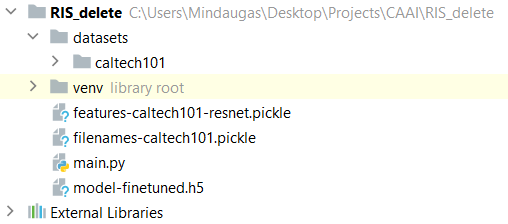

# The final code

In [ ]:
!pip install flask-ngrok
!pip install pyngrok
!ngrok authtoken 2G2T1TTJLpCSm4cHtxaqwFDXVfW_237Ck3eYD2v5eCpq3gqaA

In [ ]:
from flask import Flask, render_template, request
from keras.models import load_model
from keras import Sequential
from keras.layers import GlobalAveragePooling2D
from sklearn.neighbors import NearestNeighbors
import pickle
import numpy as np
from PIL import Image
import base64
from flask import render_template_string
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/upload')
def display_upload_form():
    return """
    <html>
       <body>
          <pre>{0}</pre>
          <form action = "http://localhost:5000/uploader" method = "POST" 
             enctype = "multipart/form-data">
             <input type = "file" name = "file" />
             <input type = "submit"/>
          </form>
       </body>
    </html>
    """.format(list(feature_list[889]))

@app.route('/uploader', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        img = Image.open(request.files['file'])
        img = img.resize((224, 224)) # resize the image to be 224 x 224
        img = np.array(img) # https://stackoverflow.com/a/47515649
        img = np.expand_dims(img, axis=0) # add a dimension to the np array : (None, 224, 224, 3)

        # 2. ... as the image is being uploaded get feature list
        finetunned_cnn = Sequential()
        finetunned_cnn.add(model_finetuned.get_layer('resnet50')) # 'mobilenet_1.00_224'
        finetunned_cnn.add(GlobalAveragePooling2D()) # convert from (1, 7, 7, 2048) to (1, 2048), not needed for mobilenet
        feature_list = finetunned_cnn.predict(img)
        # print(feature_list.shape)
        # return f"<pre>{str(list(feature_list))}</pre>" \
        #       f"<br><br>" \
        #       f"<pre>{len(list(feature_list)[0])}</pre>"

        # 3. ... then after you have the feature list, get the most similar feature list
        distances, indices = neighbors.kneighbors(feature_list)
        # return "Distances: " + str(list(distances)) + " <br> " + \
        #         " Indeces: " + str(list(indices))

        return render_template_string('''
        <!DOCTYPE html>
        <html>
            <head>
                <title>Index</title>
            </head>
            <body>
                <img src="data:image/png;base64,{{ img1_str }}"/>
                <img src="data:image/png;base64,{{ img2_str }}"/>
                <img src="data:image/png;base64,{{ img3_str }}"/>
                <img src="data:image/png;base64,{{ img4_str }}"/>
                <img src="data:image/png;base64,{{ img5_str }}"/>
            </body>
        </html>
        ''', img1_str = base64.b64encode(open(filenames[indices[0][0]], 'rb').read()).decode("utf-8"),
            img2_str = base64.b64encode(open(filenames[indices[0][1]], 'rb').read()).decode("utf-8"),
            img3_str = base64.b64encode(open(filenames[indices[0][2]], 'rb').read()).decode("utf-8"),
            img4_str = base64.b64encode(open(filenames[indices[0][3]], 'rb').read()).decode("utf-8"),
            img5_str = base64.b64encode(open(filenames[indices[0][4]], 'rb').read()).decode("utf-8"))

@app.route('/')
def hello_world():
    return 'Hello Flask !!!'

@app.route('/greet')
def greet():
    return '<h1 style="color: red">Hi Mindaugas !!!</h1>'

if __name__ == '__main__':
    # 0. While loading the app, import the weights and the filenames
    feature_list = pickle.load(open('./data/features-caltech101-resnet.pickle', 'rb'))
    filenames = pickle.load(open('./data/filenames-caltech101.pickle', 'rb'))
    model_finetuned = load_model('./model-finetuned.h5')

    # 1. ... define the indexer
    neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
    app.run()